In [12]:
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt

# Bus fare and destination Analysis of Kenya/Tanzania

This is a quick scraping exercise that I did using online bus ticketing websites in Kenya and Tanzania. Originally this data was to be used for business intelligence, but the project ultimately fell apart. As such I decided to finalize the analysis and make the datasets public in the hope that it would be useful to someone. The full scripts for scraping the data are available within each folder. These scripts can be used as a template for scraping most travel websites.

## About the Data
These are sites that offer bus tickets in Kenya and Tanzania. The fares change and The hope is to analyze the prices and number/amount of passengers per bus, the change in the number of passengers, etc.

### Dar-Express
Dar express uses HTMl tables to show the data, which makes it possible to scrape with only pandas (read_html). 
### Shabiby
Shabiby might have the most interesting data. I had to use beautiful soup to collect the data.
### Buupass
Buupass is a website that offers multiple bus tickets to and from various destinations by various bus companies in Kenya. I did an initial scrape, then only scraped the existing routes, because there was too much data. I also had to incorporate multithreading because there were so many requests that needed to be sent. The original script was taking more than 24 hours to run. Limiting the number of destinations to search reduced the time down to only 8-12 hours and multithreading reduced it to less than 2 hours. 

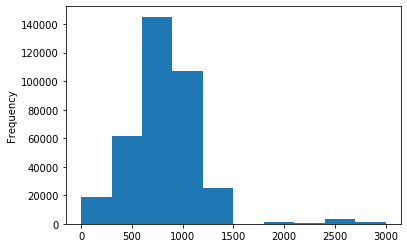

In [13]:
buu = listdir("./buupass/")
buu = [b for b in buu if b.endswith(".csv")]
buu = [b for b in buu if b != "buupass_places.csv"]
buu_df = [pd.read_csv("./buupass/"+b, index_col=0) for b in buu]
buu_df = pd.concat(buu_df, axis=0, ignore_index=True)
buu_df.price.plot.hist()


/home/tyler/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


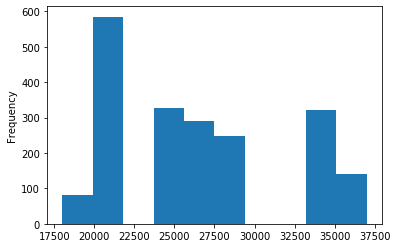

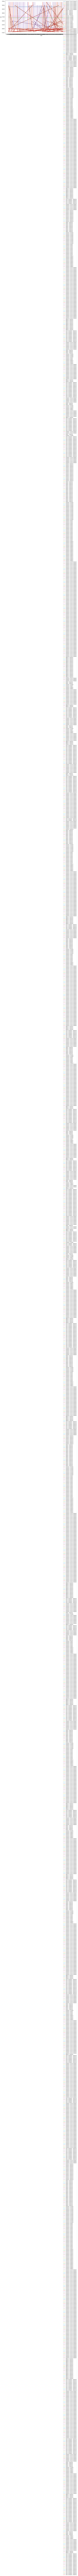

In [24]:
shabiby = listdir("./shabiby/")
shabiby = [s for s in shabiby if s.endswith(".csv")]
shabiby_df = [pd.read_csv("./shabiby/"+s, index_col=0) for s in shabiby]
shabiby_df = pd.concat(shabiby_df, axis=0, ignore_index=True)
shabiby_df.fare.plot.hist()
fig,ax=plt.subplots(figsize=(15,7))
temp=shabiby_df[['origin','destination','date','fare']]
temp['route']=temp.origin + " - " + temp.destination
temp.drop(['origin','destination'], axis=1, inplace=True)
for route in temp.route.values:
    ax.plot(temp[temp.route==route].date,temp[temp.route==route].fare,label=route)

ax.set_xlabel("date")
ax.set_ylabel("fare")
ax.legend(loc='best')

In [ ]:
dar = listdir("./dar-express_routes/")
dar = [d for d in dar if d.endswith(".csv")]
dar_df = [pd.read_csv("./dar-express_routes/"+d, index_col=0) for d in dar]
for item in dar_df:
    item.columns = map(str.lower, item.columns) #This is to fix discrepencies in the formatting
dar_df=pd.concat(dar_df, axis=0, ignore_index=True)
dar_df["adult fare"].plot.hist()